In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter
 
import matplotlib.pyplot as plt
import os
os.chdir("/Users/Philip/Downloads")             
#change DIRECTORY TO downloads where final outputs ARE

# Capitalized features are user-generated

In [21]:
df_b_listings = pd.read_csv("boston_listings_airbnb.csv")            #import and concat boston and cambridge 
df_c_listings = pd.read_csv("cambridge_listings_airbnb.csv")
df_c_calendar = pd.read_csv("cambridge_calendar_airbnb.csv")
df_b_calendar = pd.read_csv("boston_calendar_airbnb.csv")
df_c_reviews = pd.read_csv("cambridge_reviews_airbnb.csv")
df_b_reviews = pd.read_csv("boston_reviews_airbnb.csv")
df_b_listings['City']='Boston'
df_c_listings['City']='Cambridge'
df_listings = pd.concat([df_b_listings,df_c_listings])
df_c_calendar['City']='Cambridge'
df_b_calendar['City']='Boston'
df_calendar = pd.concat([df_b_calendar,df_c_calendar])
df_c_reviews['City']='Cambridge'
df_b_reviews['City']='Boston'
df_reviews = pd.concat([df_b_reviews,df_c_reviews])

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace(',', '')
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace('$', '').astype(float)
df_listings['price'] = df_listings['price'].str.replace('$', '')
df_listings['price'] = df_listings['price'].str.replace(',', '')
df_listings['price'] = df_listings['price'].str.replace('.', '').astype(float)
df_listings['price'] = df_listings['price']/100

In [3]:
pd.set_option('display.max_columns', None)            #display MAX columns for listings 109 features
#df_listings.head()
#df_reviews.tail()

In [23]:
#IMPORTANT TO CAST THE DATE INTO MONTH AND YEAR FOR REVIEWS
df_reviews['Year'] = pd.DatetimeIndex(df_reviews['date']).year
df_reviews['Month'] = pd.DatetimeIndex(df_reviews['date']).month
df_reviews['Month']=pd.DatetimeIndex(df_reviews['date']).strftime("%B")
df_reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,City,Year,Month
0,0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,Boston,2015,July
1,1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,Boston,2015,August
2,2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,Boston,2015,September
3,3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,Boston,2015,September
4,4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,Boston,2015,October
5,5,3781,63371931,2016-02-22,55456499,John-Mark,Frank was very accommodating throughout my sta...,Boston,2016,February
6,6,3781,67909504,2016-04-01,55456499,John-Mark,Excellent! This was my second stay at the Jeff...,Boston,2016,April
7,7,3781,97906006,2016-08-28,88528884,Elisa,Frank was a wonderful and accommodating host. ...,Boston,2016,August
8,8,3781,105143774,2016-09-30,1342806,Nicole,"Frank was great, the apartment has everything ...",Boston,2016,September
9,9,3781,129692749,2017-02-01,55126634,Carlos,Very nice. Comfortable apartment. Good locatio...,Boston,2017,February


In [24]:
df_reviews.to_csv("cleaned_reviews_airbnb.csv")

In [25]:
df_listings.to_csv("cleaned_listings_airbnb.csv")

In [26]:
df_calendar.to_csv("cleaned_calendar_airbnb.csv")

In [8]:
df_reviews to have actual months of REVIEW DONE ABOVE WITH as date
df_reviews['Month'] = df_reviews.date.str.replace(r'(^.*2020-01.*$)','January' )
df_reviews['Month'] = df_reviews.date.str.replace(r'(^.*2020-02.*$)','February' )
df_reviews['Month'] = df_reviews.date.str.replace(r'(^.*2020-03.*$)','March' )
df_reviews['Month'] = df_reviews.date.str.replace(r'(^.*2020-04.*$)','April' )     #add extra months as necessary
df_reviews['Month'] = df_reviews.date.str.replace(r'(^.*2020-05.*$)','May' )
df_reviews.query('date=="April"')

#new dataframe with only the dates I want Jan 2020 on
df_rev=df_reviews[df_reviews.date == "January"]
df_rev=pd.concat([df_rev,df_reviews[df_reviews.date == "February"]])
df_rev=pd.concat([df_rev,df_reviews[df_reviews.date == "March"]])
df_rev=pd.concat([df_rev,df_reviews[df_reviews.date == "April"]])
df_rev=pd.concat([df_rev,df_reviews[df_reviews.date == "May"]])
df_reviews
help(str.replace)

In [11]:
df_reviews.dtypes

Unnamed: 0        int64
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
City             object
Year              int64
Month            object
dtype: object

In [18]:
#new dataframe with only the dates I want Jan 2020 on
df_rev=df_reviews.loc[df_reviews.Month == "January"]
df_rev=df_rev.loc[df_rev.Year == 2020]


,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,City,Year,Month
4079,4079,315982,586070443,2020-01-01,95114880,Mary Beth,We had a really excellent meditation experienc...,Boston,2020,January
4080,4080,315982,587725725,2020-01-03,53877170,Caroline,This was a wonderful experience in Sedona! Mic...,Boston,2020,January
7763,7763,820073,587090980,2020-01-02,126731156,Louise,This apartment was one of the highlights of ou...,Boston,2020,January
7954,7954,863788,586151265,2020-01-01,155367140,John,Andy & Daljit's place is a true five stars! \n...,Boston,2020,January
8352,8352,891661,586094616,2020-01-01,119604445,Sheila,Fantastic location and accommodations. I would...,Boston,2020,January
11903,11903,1275498,588411683,2020-01-04,95249105,Pam,"Lovely, clean and well-appointed studio apartm...",Boston,2020,January
12499,12499,1321422,586139419,2020-01-01,208493003,Summer,Beautiful spot and great hospitality. Response...,Boston,2020,January
12500,12500,1321422,587032449,2020-01-02,112957683,Steven,A stylist place with great location to the wat...,Boston,2020,January
12501,12501,1321422,587880622,2020-01-03,40423090,Virginia,"Beautiful accommodations, gracious hosts, extr...",Boston,2020,January
13172,13172,1332786,586253587,2020-01-01,170168692,Shigeki,Sophisticated people on the outskirts of Boston.,Boston,2020,January


In [ ]:
df_c_reviews['City']='Cambridge'
df_b_reviews['City']='Boston'
df_reviews = pd.concat([df_b_reviews,df_c_reviews])
df_reviews['good_date'] =  pd.to_datetime(df_reviews['date'], infer_datetime_format=True)

In [20]:
#Find Unique properties ids number of comments per unique properties

df_reviews=pd.merge(df_reviews,df_reviews.groupby(['listing_id','City'],as_index=False)['comments'].count(), on=['listing_id','City'])
df_reviews=pd.merge(df_reviews,df_reviews.groupby(['listing_id','City','date'],as_index=False)['comments'].count(), on=['listing_id','City','date'])
df_reviews=pd.merge(df_reviews,df_reviews.groupby(['listing_id','Month','Year'],as_index=False)['comments'].count(), on=['listing_id','Month','Year'])


,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,City,Year,Month
4079,4079,315982,586070443,2020-01-01,95114880,Mary Beth,We had a really excellent meditation experienc...,Boston,2020,January
4080,4080,315982,587725725,2020-01-03,53877170,Caroline,This was a wonderful experience in Sedona! Mic...,Boston,2020,January
7763,7763,820073,587090980,2020-01-02,126731156,Louise,This apartment was one of the highlights of ou...,Boston,2020,January
7954,7954,863788,586151265,2020-01-01,155367140,John,Andy & Daljit's place is a true five stars! \n...,Boston,2020,January
8352,8352,891661,586094616,2020-01-01,119604445,Sheila,Fantastic location and accommodations. I would...,Boston,2020,January
11903,11903,1275498,588411683,2020-01-04,95249105,Pam,"Lovely, clean and well-appointed studio apartm...",Boston,2020,January
12499,12499,1321422,586139419,2020-01-01,208493003,Summer,Beautiful spot and great hospitality. Response...,Boston,2020,January
12500,12500,1321422,587032449,2020-01-02,112957683,Steven,A stylist place with great location to the wat...,Boston,2020,January
12501,12501,1321422,587880622,2020-01-03,40423090,Virginia,"Beautiful accommodations, gracious hosts, extr...",Boston,2020,January
13172,13172,1332786,586253587,2020-01-01,170168692,Shigeki,Sophisticated people on the outskirts of Boston.,Boston,2020,January


In [ ]:
df_listings['thumbnail_url'].head(100)

In [ ]:
df_reviews.shape

In [22]:
#PERCENT OF REVIEWS COLUMNS HAVE NAN
(len(df_reviews)-df_reviews.count())/len(df_reviews))

Unnamed: 0       0.000000
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000012
comments_x       0.000663
City             0.000000
comments_y       0.000000
dtype: float64

In [7]:
#percentage OF NAs by feature
(len(df_calendar)-df_calendar.count())/len(df_calendar)

listing_id        0.000000
date              0.000000
available         0.000000
price             0.000803
adjusted_price    0.000803
minimum_nights    0.000051
maximum_nights    0.000051
Month             0.000000
Year              0.000000
City              0.000000
dtype: float64

In [ ]:
(len(df_listings)-df_listings.count())/len(df_listings)

In [ ]:
#SET THE STYLE
sns.set(style="darkgrid")

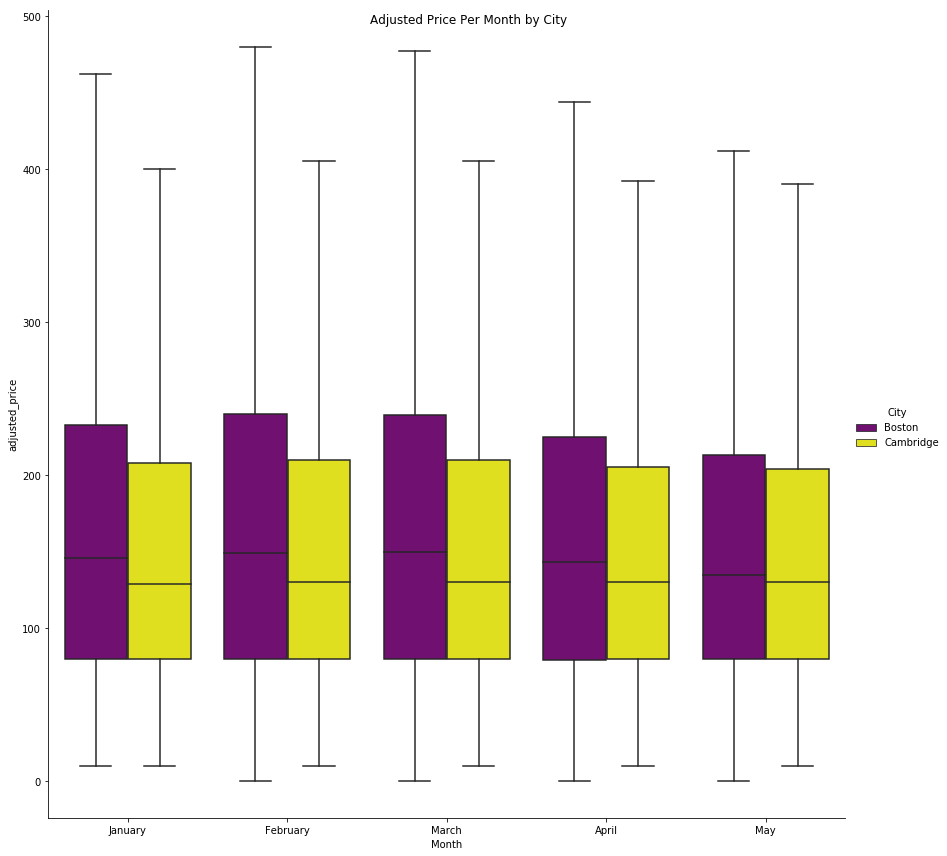

In [18]:

ax3 = sns.catplot(x="Month", y="adjusted_price",hue="City",kind='box',data=df_calendar,height=12, aspect=1, showfliers=False, palette=sns.color_palette(['purple', 'yellow']))
#ax.legend(loc='upper right')
ax3.fig.suptitle('Adjusted Price Per Month by City')
#ax3.set_yscale("log")
#plt.yscale('log')
plt.savefig('adjprice.jpg')


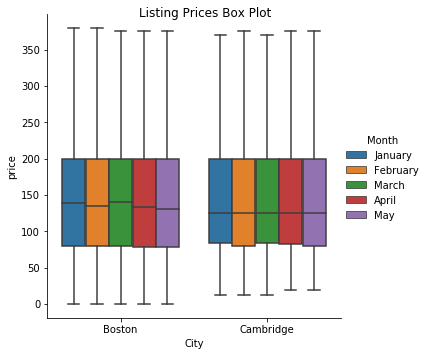

In [15]:
ax9 = sns.catplot(x="City",y='price',hue='Month', kind='box',showfliers=False,data=df_listings)
#ax.legend(loc='upper right')
ax9.fig.suptitle('Listing Prices Box Plot')
#plt.ylim(0, 30)
plt.savefig('listingprices.jpg')